In [1]:

import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def gen_curve(offset, scale, noise=200, decay=False):
    base = scale * (1 - np.exp(-timesteps / 4e4)) + offset
    if decay:
        base *= (1 - 0.1 * np.sin(timesteps / 2e4))
    return base + np.random.normal(0, noise, size=timesteps.shape)


def compressor(run, sens=15, episodes=60):
    run_copy = np.copy(run)
    for _ in range(episodes):
        for i in range(1, run_copy.shape[0]-1):
            min_val = min(run_copy[i-1],run_copy[i+1])
            #max_val = max(run[i-1],run[i+1])
            if run_copy[i] <= min_val*sens:
                run_copy[i] = np.mean([run_copy[i-1],run_copy[i+1]])
    return run_copy

def compressor(run, sens=15, episodes=60):
    run_copy = np.copy(run)
    for _ in range(episodes):
        for i in range(1, run_copy.shape[0]-1):
            min_val = min(run_copy[i-1],run_copy[i+1])
            #max_val = max(run[i-1],run[i+1])
            if run_copy[i] <= min_val*sens:
                run_copy[i] = np.mean([run_copy[i-1],run_copy[i+1]])
    return run_copy

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def gen_curve(offset, scale, noise=200, decay=False):
    base = scale * (1 - np.exp(-timesteps / 4e4)) + offset
    if decay:
        base *= (1 - 0.1 * np.sin(timesteps / 2e4))
    return base + np.random.normal(0, noise, size=timesteps.shape)

In [3]:
# === Путь к логам ===
no1 = '/home/daniil/Рабочий стол/Accelerator/WORKSHOP_RUNS/PickCube-v1/[NO_PAD]|seed=1|AddAsc=False|UseTrData=True|'
no2 = '/home/daniil/Рабочий стол/Accelerator/WORKSHOP_RUNS/PickCube-v1/[NO_PAD]|seed=2|AddAsc=False|UseTrData=True|'
no3 = '/home/daniil/Рабочий стол/Accelerator/WORKSHOP_RUNS/PickCube-v1/[NO_PAD]|seed=3|AddAsc=False|UseTrData=True|'
no4 = '/home/daniil/Рабочий стол/Accelerator/WORKSHOP_RUNS/PickCube-v1/[NO_PAD]|seed=4|AddAsc=False|UseTrData=True|'

cl1 = 'runs/[NO_SLICE_AT_ALL]PickCube-v1__D_ver5_NEW_clear_pad__1__1746023991'
cl2 = 'runs/[NO_SLICE_AT_ALL]PickCube-v1__D_ver5_NEW_clear_pad__2__1746034373'
cl3 = 'runs/[NO_SLICE_AT_ALL]PickCube-v1__D_ver5_NEW_clear_pad__3__1746046809'

z1 = 'runs/[ZERO_PAD]PickCube-v1__D_ver5_NEW_zero_pad__1__1746022909'
z2 = 'runs/[ZERO_PAD]PickCube-v1__D_ver5_NEW_zero_pad__2__1746033329'
z3 = 'runs/[ZERO_PAD]PickCube-v1__D_ver5_NEW_zero_pad__3__1746061755'

l1 = 'runs/[LAST_PAD]PickCube-v1__D_ver5_NEW_last_pad__1__1746045568'
l2 = 'runs/[LAST_PAD]PickCube-v1__D_ver5_NEW_last_pad__2__1746055937'
l3 = 'runs/[LAST_PAD]PickCube-v1__D_ver5_NEW_last_pad__3__1746066318' 

# === Чтение каждого лога ===
no1 = EventAccumulator(no1); no1.Reload()
no2 = EventAccumulator(no2); no2.Reload()
no3 = EventAccumulator(no3); no3.Reload()
no4 = EventAccumulator(no4); no4.Reload()


cl1 = EventAccumulator(cl1); cl1.Reload()
cl2 = EventAccumulator(cl2); cl2.Reload()
cl3 = EventAccumulator(cl3); cl3.Reload()

z1 = EventAccumulator(z1); z1.Reload()
z2 = EventAccumulator(z2); z2.Reload()
z3 = EventAccumulator(z3); z3.Reload()

l1 = EventAccumulator(l1); l1.Reload()
l2 = EventAccumulator(l2); l2.Reload()
l3 = EventAccumulator(l3); l3.Reload()

# === Список тегов ===
tags1 = ['Eval_sr_once']
tags2 = ['eval/success_once']

def get_vals(ea, tag):
    events = ea.Scalars(tag)
    steps = np.array([e.step for e in events])
    vals = np.array([e.value for e in events])
    return steps, vals

In [4]:
no1_s, no1_v = get_vals(no1, 'Eval_sr_once')
no2_s, no2_v = get_vals(no2, 'Eval_sr_once')
no3_s, no3_v = get_vals(no3, 'Eval_sr_once')
no4_s, no4_v = get_vals(no4, 'Eval_sr_once')

cl1_s, cl1_v = get_vals(cl1, 'eval/success_once')
cl2_s, cl2_v = get_vals(cl2, 'eval/success_once')
cl3_s, cl3_v = get_vals(cl3, 'eval/success_once')

z1_s, z1_v = get_vals(z1, 'eval/success_once')
z2_s, z2_v = get_vals(z2, 'eval/success_once')
z3_s, z3_v = get_vals(z3, 'eval/success_once')

l1_s, l1_v = get_vals(l1, 'eval/success_once')
l2_s, l2_v = get_vals(l2, 'eval/success_once')
l3_s, l3_v = get_vals(l3, 'eval/success_once')

In [58]:
no1_v.shape, no2_v.shape, no3_v.shape, no4_v.shape

((75,), (1,), (36,), (1,))

In [52]:
cl1_v.shape, cl2_v.shape, cl3_v.shape

((47,), (47,), (67,))

In [53]:
z1_v.shape, z2_v.shape, z3_v.shape

((47,), (47,), (67,))

In [54]:
l1_v.shape, l2_v.shape, l3_v.shape

((47,), (47,), (47,))

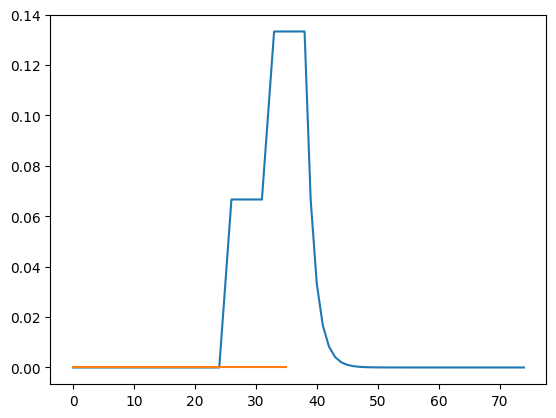

In [71]:
plt.plot(no1_v)
plt.plot(no3_v)

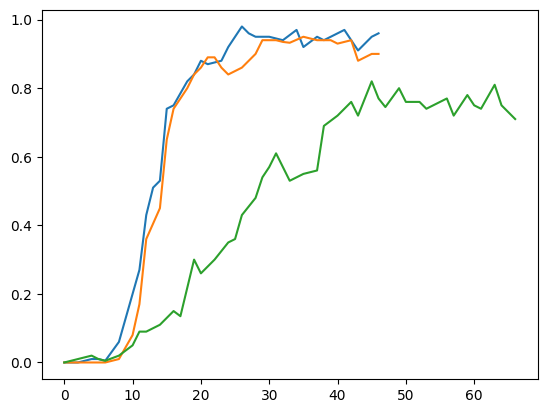

In [70]:
plt.plot(cl1_v)
plt.plot(cl2_v)
plt.plot(cl3_v)

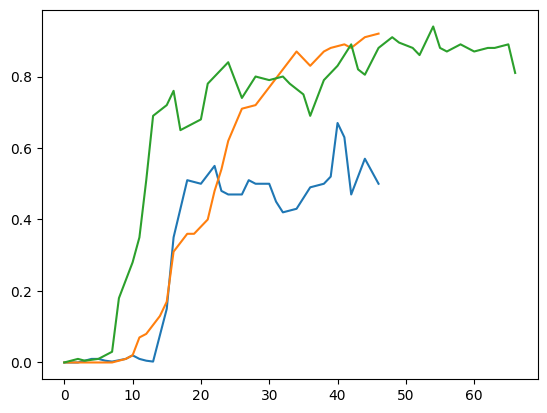

In [69]:
plt.plot(z1_v)
plt.plot(z2_v)
plt.plot(z3_v)

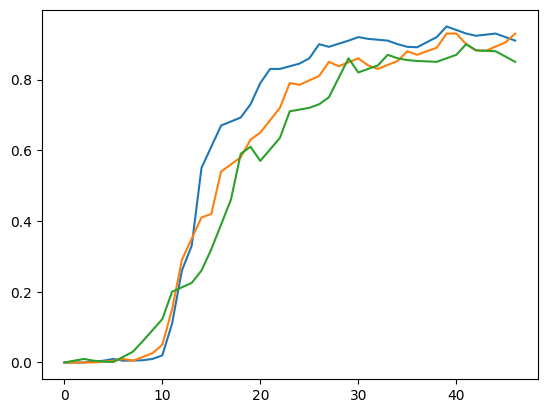

In [75]:
plt.plot(l1_v)
plt.plot(l2_v)
plt.plot(l3_v)

In [5]:
sens = 2
episodes = 4

no1_v = compressor(no1_v, sens=sens, episodes=episodes)
no2_v = compressor(no2_v, sens=sens, episodes=episodes)
    
cl1_v = compressor(cl1_v, sens=sens, episodes=episodes)
cl2_v = compressor(cl2_v, sens=sens, episodes=episodes)
cl3_v = compressor(cl3_v, sens=sens, episodes=episodes)

z1_v = compressor(z1_v, sens=sens, episodes=episodes)
z2_v = compressor(z2_v, sens=sens, episodes=episodes)
z3_v = compressor(z3_v, sens=sens, episodes=episodes)
    
l1_v = compressor(l1_v, sens=sens, episodes=episodes)
l2_v = compressor(l2_v, sens=sens, episodes=episodes)
l3_v = compressor(l3_v, sens=sens, episodes=episodes)


In [14]:
# cutout = 52

# mean_no = (no1_v[:36] + no3_v[:36]) / 2
# std_no  = np.abs(no1_v[:36] - no3_v[:36]) / 2

# mean_cl = (cl1_v[:47] + cl2_v[:47] + cl3_v[:47]) / 3
# #std_cl = np.abs(cl1_v[:47] - cl2_v[:47] - cl3_v[:47]) / 5
# cl_stack = np.stack([cl1_v[:47], cl2_v[:47], cl3_v[:47]])
# std_cl = np.std(cl_stack, axis=0)
# std_cl = std_cl/ np.sqrt(3)

# mean_z = (z1_v[:47] + z2_v[:47] + z3_v[:47]) / 3
# #std_z  = np.abs(z1_v[:47] - z2_v[:47] - z3_v[:47]) / 5
# z_stack = np.stack([z1_v[:47], z2_v[:47], z3_v[:47]])
# std_z = np.std(z_stack, axis=0)
# std_z = std_z / np.sqrt(3)

# mean_l = (l1_v[:47] + l2_v[:47] + l3_v[:47]) / 3
# #std_l = np.abs(l1_v[:47] - l2_v[:47] - l3_v[:47]) / 5
# l_stack = np.stack([l1_v[:47], l2_v[:47], l3_v[:47]])
# std_l = np.std(l_stack, axis=0)
# std_l = std_l/ np.sqrt(3)

In [15]:
cutout = 52

# Noised
no_stack = np.stack([no1_v[:36], no3_v[:36]])
mean_no = np.mean(no_stack, axis=0)
std_no  = np.std(no_stack, axis=0, ddof=1) / np.sqrt(2)

# Clean
cl_stack = np.stack([cl1_v[:47], cl2_v[:47], cl3_v[:47]])
mean_cl = np.mean(cl_stack, axis=0)
std_cl = np.std(cl_stack, axis=0, ddof=1) / np.sqrt(3)

# Z-filtered
z_stack = np.stack([z1_v[:47], z2_v[:47], z3_v[:47]])
mean_z = np.mean(z_stack, axis=0)
std_z = np.std(z_stack, axis=0, ddof=1) / np.sqrt(3)

# L-filtered
l_stack = np.stack([l1_v[:47], l2_v[:47], l3_v[:47]])
mean_l = np.mean(l_stack, axis=0)
std_l = np.std(l_stack, axis=0, ddof=1) / np.sqrt(3)


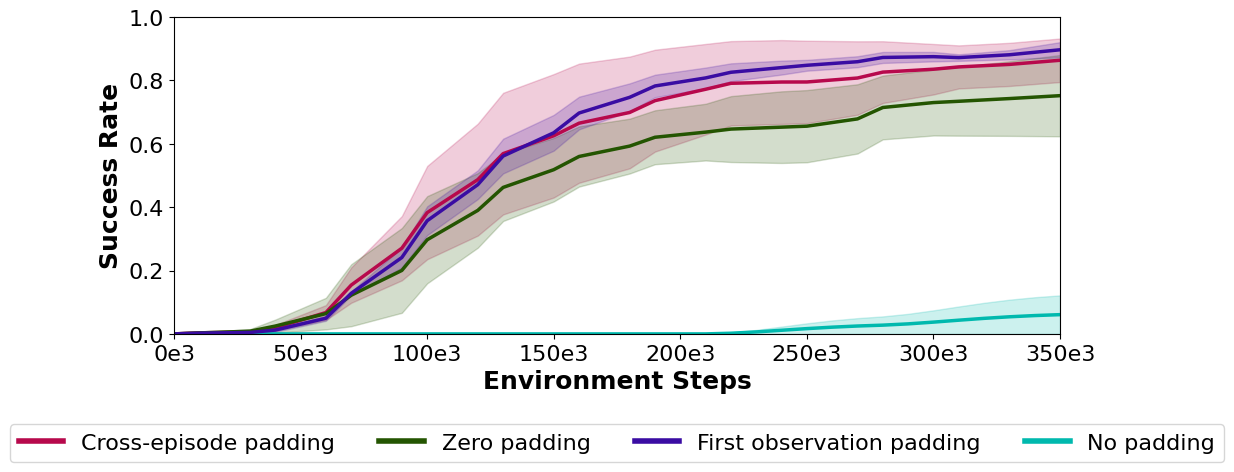

In [16]:
# ========= Отрисовка графика ============
fig, ax = plt.subplots(figsize=(12, 5))
fig.patch.set_facecolor('white')
#ax.set_facecolor('#fff7e6')
cl1_s[-1] = 350000

# MDP_PRETRAINED (сплошные линии)
line1, = ax.plot(no3_s, mean_no, label='Method 1', color='#00b9ae', linewidth=2.5)
ax.fill_between(no3_s, mean_no - std_no, mean_no + std_no, color='#00b9ae', alpha=0.2)

line2, = ax.plot(cl1_s[::2], mean_cl[::2], label='No padding', color='#b7094c', linewidth=2.5)
ax.fill_between(cl1_s[::2], mean_cl[::2] - std_cl[::2], mean_cl[::2] + std_cl[::2], color='#b7094c', alpha=0.2)

line2, = ax.plot(cl1_s[::2], mean_z[::2], label='Zero padding', color='#245501', linewidth=2.5)
ax.fill_between(cl1_s[::2], mean_z[::2] - std_z[::2], mean_z[::2] + std_z[::2], color='#245501', alpha=0.2)

line2, = ax.plot(cl1_s[::2], mean_l[::2], label='First state padding', color='#3a0ca3', linewidth=2.5)
ax.fill_between(cl1_s[::2], mean_l[::2] - std_l[::2], mean_l[::2] + std_l[::2], color='#3a0ca3', alpha=0.2)


# ===== Оформление графика =====
ax.set_xlabel("Environment Steps", fontsize=18, weight='bold')
ax.set_ylabel("Success Rate", fontsize=18, weight='bold')
ax.set_ylim(0, 1)  # Установка диапазона оси Y
ax.set_xlim(left=0, right=cl1_s[::2][-1])
ax.tick_params(axis='both', which='major', labelsize=16)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1e3)}e3"))

# Легенда без рамки, с увеличенным шрифтом и жирными линиями
legend = ax.legend(
    handles=[
        plt.Line2D([0], [0], color='#b7094c', linewidth=4, label='Cross-episode padding'),
        plt.Line2D([0], [0], color='#245501', linewidth=4, label='Zero padding'),
        plt.Line2D([0], [0], color='#3a0ca3', linewidth=4, label='First observation padding'),
        plt.Line2D([0], [0], color='#00b9ae', linewidth=4, label='No padding')
    ],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),  # центрируем под графиком
    ncol=4,  # <-- теперь в одну строку
    fontsize=16,
    frameon=True
)
legend.get_frame()#.set_facecolor('#fff7e6')
legend.get_frame()#.set_edgecolor('#fff7e6')  # Цвет рамки как у фона, чтобы была "невидимой"

plt.tight_layout()
plt.show()

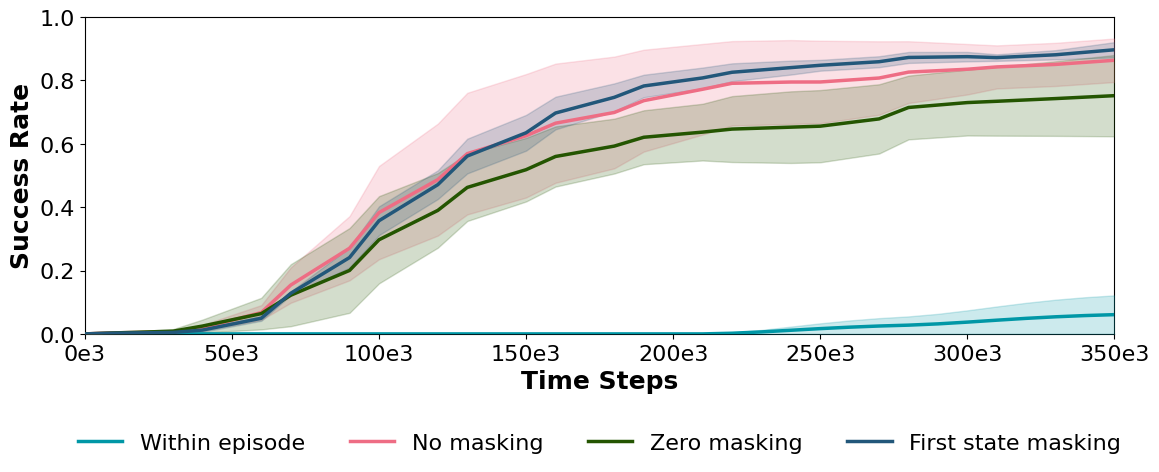

In [17]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Цветовая палитра
colors = ['#245501', '#22577A', '#EE6D84', '#0097A6']

# Стиль
linewidth = 2.5
fill_alpha = 0.2


cl1_s[-1] = 350000

# Мой график
fig, ax = plt.subplots(figsize=(12, 5))
fig.patch.set_facecolor('white')

# Отображение данных с заливкой и линиями
ax.plot(no3_s, mean_no, label='Within episode', color=colors[3], linewidth=linewidth, zorder=5)
ax.fill_between(no3_s, mean_no - std_no, mean_no + std_no, color=colors[3], alpha=fill_alpha, zorder=3)

ax.plot(cl1_s[::2], mean_cl[::2], label='No masking', color=colors[2], linewidth=linewidth, zorder=5)
ax.fill_between(cl1_s[::2], mean_cl[::2] - std_cl[::2], mean_cl[::2] + std_cl[::2], color=colors[2], alpha=fill_alpha, zorder=3)

ax.plot(cl1_s[::2], mean_z[::2], label='Zero masking', color=colors[0], linewidth=linewidth, zorder=5)
ax.fill_between(cl1_s[::2], mean_z[::2] - std_z[::2], mean_z[::2] + std_z[::2], color=colors[0], alpha=fill_alpha, zorder=3)

ax.plot(cl1_s[::2], mean_l[::2], label='First state masking', color=colors[1], linewidth=linewidth, zorder=5)
ax.fill_between(cl1_s[::2], mean_l[::2] - std_l[::2], mean_l[::2] + std_l[::2], color=colors[1], alpha=fill_alpha, zorder=3)

# Оформление осей
ax.set_xlabel("Time Steps", fontsize=18, weight='bold')
ax.set_ylabel("Success Rate", fontsize=18, weight='bold')
ax.set_ylim(0, 1)  # Диапазон оси Y
ax.set_xlim(left=0, right=cl1_s[::2][-1])
ax.tick_params(axis='both', labelsize=16)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1e3)}e3"))

# Легенда без рамки, с увеличенным шрифтом и жирными линиями
legend = ax.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),  # Центрируем под графиком
    ncol=4,  # В одну строку
    fontsize=16,
    frameon=True,
    facecolor='white',
    edgecolor='white'
)
plt.tight_layout()
plt.show()


In [1]:
import numpy as np

In [18]:
mr =  np.array([88.2, 77.02])

m = np.array([79.29, 77.5, 81.78])

e = np.array([86.15, 103.1, ])

print(np.mean(mr), np.std(mr))

print(np.mean(m), np.std(m))

print(np.mean(e), np.std(e))

82.61 5.590000000000003
79.52333333333334 1.7550751804093434
94.625 8.474999999999994


In [ ]:
mr =  np.array([])

m = np.array([])

e = np.array([1])

print(np.mean(mr), np.std(mr))

print(np.mean(m), np.std(m))

print(np.mean(e), np.std(e))

38.905 4.435000000000002
74.59 1.3299999999999983
1.0 0.0
